## Goal:  EDA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import pickle


from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl
import sys, os

# enable pandas to show all the column
pd.set_option('display.max_columns', 500)

## Read data

In [20]:
portfolio=['VZ', 'TSLA', 'INTC', 'CAT', 'JNJ', 'PFE', 'AAPL', 'MSFT']

In [2]:
def preprocess(data, nonfeatures=['unnamed: 0', 'dimension', 'calendardate', 'datekey', 'lastupdated']):
    # keep feature data only
    data.rename({'reportperiod':'date'}, inplace=True, axis=1)
    data.columns = [c.lower().strip() for c in data.columns]
    data.drop(nonfeatures, axis=1, inplace=True)
    data.drop(['ticker', 'accoci', 'assets', 'assetsavg', 'assetsc',
       'assetsnc', 'assetturnover', 'bvps', 'capex', 'cashneq',
       'cashnequsd', 'cor', 'consolinc', 'currentratio', 'de', 'debt',
       'debtc', 'debtnc', 'debtusd', 'deferredrev', 'depamor', 'deposits',
       'divyield', 'dps', 'ebit', 'ebitda','ebitdamargin', 'ebitdausd',
       'ebitusd', 'ebt', 'eps', 'epsdil', 'epsusd', 'equity', 'equityavg',
       'equityusd', 'ev', 'evebit', 'evebitda', 'fcf', 'fcfps', 'fxusd',
       'gp', 'grossmargin', 'intangibles', 'intexp', 'invcap',
       'invcapavg', 'inventory', 'investments', 'investmentsc',
       'investmentsnc', 'liabilities', 'liabilitiesc', 'liabilitiesnc',
       'marketcap', 'ncf', 'ncfbus', 'ncfcommon', 'ncfdebt', 'ncfdiv',
       'ncff', 'ncfi', 'ncfinv', 'ncfo', 'ncfx', 'netinc', 'netinccmn',
       'netinccmnusd', 'netincdis', 'netincnci', 'netmargin', 'opex',
       'opinc', 'payables', 'payoutratio', 'pb', 'pe', 'pe1', 'ppnenet',
       'prefdivis', 'price', 'ps', 'ps1', 'receivables', 'retearn',
       'revenue', 'revenueusd', 'rnd', 'roa', 'roe', 'roic', 'ros',
       'sbcomp', 'sgna', 'sharefactor', 'sharesbas', 'shareswa',
       'shareswadil', 'sps', 'tangibles', 'taxassets', 'taxexp',
       'taxliabilities', 'tbvps', 'workingcapital'], axis=1, inplace=True)
    data.columns = ['date', 'open', 'close', 'high', 'low', 'adj close', 'volume',  'rsi_6', 'bbands_6_h_ind',
       'bbands_6_l_ind', 'bbands_6hband', 'bbands_6lband', 'atr_6',
       'donchain_6hband', 'donchain_6lband', 'keltner_6_h_ind',
       'keltner_6_l_ind', 'stoch_6', 'cmf_6', 'sma_6', 'ema_6', 'obv',
       'vpt', 'adi', 'rsi_18', 'macd_f6_s18', 'bbands_18_h_ind',
       'bbands_18_l_ind', 'bbands_18hband', 'bbands_18lband', 'atr_18',
       'donchain_18hband', 'donchain_18lband', 'keltner_18_h_ind',
       'keltner_18_l_ind', 'stoch_18', 'cmf_18', 'sma_18',
       'sma_cross_f6_s18', 'ema_18', 'rsi_24', 'macd_f6_s24',
       'macd_f18_s24', 'bbands_24_h_ind', 'bbands_24_l_ind',
       'bbands_24hband', 'bbands_24lband', 'atr_24', 'donchain_24hband',
       'donchain_24lband', 'keltner_24_h_ind', 'keltner_24_l_ind',
       'stoch_24', 'cmf_24', 'ichi_conv_6_18_24', 'ichi_base_6_18_24',
       'ichi_diff_6_18_24', 'sma_24', 'sma_cross_f6_s24',
       'sma_cross_f18_s24', 'ema_24', 'rsi_30', 'macd_f6_s30',
       'macd_f18_s30', 'macd_f24_s30', 'bbands_30_h_ind',
       'bbands_30_l_ind', 'bbands_30hband', 'bbands_30lband', 'atr_30',
       'donchain_30hband', 'donchain_30lband', 'keltner_30_h_ind',
       'keltner_30_l_ind', 'stoch_30', 'cmf_30', 'ichi_conv_6_18_30',
       'ichi_base_6_18_30', 'ichi_diff_6_18_30', 'ichi_conv_6_24_30',
       'ichi_base_6_24_30', 'ichi_diff_6_24_30', 'ichi_conv_18_24_30',
       'ichi_base_18_24_30', 'ichi_diff_18_24_30', 'sma_30',
       'sma_cross_f6_s30', 'sma_cross_f18_s30', 'sma_cross_f24_s30',
       'ema_30', 'rsi_50', 'macd_f6_s50', 'macd_f18_s50', 'macd_f24_s50',
       'macd_f30_s50', 'bbands_50_h_ind', 'bbands_50_l_ind',
       'bbands_50hband', 'bbands_50lband', 'atr_50', 'donchain_50hband',
       'donchain_50lband', 'keltner_50_h_ind', 'keltner_50_l_ind',
       'stoch_50', 'cmf_50', 'ichi_conv_6_18_50', 'ichi_base_6_18_50',
       'ichi_diff_6_18_50', 'ichi_conv_6_24_50', 'ichi_base_6_24_50',
       'ichi_diff_6_24_50', 'ichi_conv_18_24_50', 'ichi_base_18_24_50',
       'ichi_diff_18_24_50', 'ichi_conv_6_30_50', 'ichi_base_6_30_50',
       'ichi_diff_6_30_50', 'ichi_conv_18_30_50', 'ichi_base_18_30_50',
       'ichi_diff_18_30_50', 'ichi_conv_24_30_50', 'ichi_base_24_30_50',
       'ichi_diff_24_30_50', 'sma_50', 'sma_cross_f6_s50',
       'sma_cross_f18_s50', 'sma_cross_f24_s50', 'sma_cross_f30_s50',
       'ema_50', 'rsi_100', 'macd_f6_s100', 'macd_f18_s100',
       'macd_f24_s100', 'macd_f30_s100', 'macd_f50_s100',
       'bbands_100_h_ind', 'bbands_100_l_ind', 'bbands_100hband',
       'bbands_100lband', 'atr_100', 'donchain_100hband',
       'donchain_100lband', 'keltner_100_h_ind', 'keltner_100_l_ind',
       'stoch_100', 'cmf_100', 'ichi_conv_6_18_100', 'ichi_base_6_18_100',
       'ichi_diff_6_18_100', 'ichi_conv_6_24_100', 'ichi_base_6_24_100',
       'ichi_diff_6_24_100', 'ichi_conv_18_24_100', 'ichi_base_18_24_100',
       'ichi_diff_18_24_100', 'ichi_conv_6_30_100', 'ichi_base_6_30_100',
       'ichi_diff_6_30_100', 'ichi_conv_18_30_100', 'ichi_base_18_30_100',
       'ichi_diff_18_30_100', 'ichi_conv_24_30_100',
       'ichi_base_24_30_100', 'ichi_diff_24_30_100', 'ichi_conv_6_50_100',
       'ichi_base_6_50_100', 'ichi_diff_6_50_100', 'ichi_conv_18_50_100',
       'ichi_base_18_50_100', 'ichi_diff_18_50_100',
       'ichi_conv_24_50_100', 'ichi_base_24_50_100',
       'ichi_diff_24_50_100', 'ichi_conv_30_50_100',
       'ichi_base_30_50_100', 'ichi_diff_30_50_100', 'sma_100',
       'sma_cross_f6_s100', 'sma_cross_f18_s100', 'sma_cross_f24_s100',
       'sma_cross_f30_s100', 'sma_cross_f50_s100', 'ema_100', 'rsi_200',
       'macd_f6_s200', 'macd_f18_s200', 'macd_f24_s200', 'macd_f30_s200',
       'macd_f50_s200', 'macd_f100_s200', 'bbands_200_h_ind',
       'bbands_200_l_ind', 'bbands_200hband', 'bbands_200lband',
       'atr_200', 'donchain_200hband', 'donchain_200lband',
       'keltner_200_h_ind', 'keltner_200_l_ind', 'stoch_200', 'cmf_200',
       'ichi_conv_6_18_200', 'ichi_base_6_18_200', 'ichi_diff_6_18_200',
       'ichi_conv_6_24_200', 'ichi_base_6_24_200', 'ichi_diff_6_24_200',
       'ichi_conv_18_24_200', 'ichi_base_18_24_200',
       'ichi_diff_18_24_200', 'ichi_conv_6_30_200', 'ichi_base_6_30_200',
       'ichi_diff_6_30_200', 'ichi_conv_18_30_200', 'ichi_base_18_30_200',
       'ichi_diff_18_30_200', 'ichi_conv_24_30_200',
       'ichi_base_24_30_200', 'ichi_diff_24_30_200', 'ichi_conv_6_50_200',
       'ichi_base_6_50_200', 'ichi_diff_6_50_200', 'ichi_conv_18_50_200',
       'ichi_base_18_50_200', 'ichi_diff_18_50_200',
       'ichi_conv_24_50_200', 'ichi_base_24_50_200',
       'ichi_diff_24_50_200', 'ichi_conv_30_50_200',
       'ichi_base_30_50_200', 'ichi_diff_30_50_200',
       'ichi_conv_6_100_200', 'ichi_base_6_100_200',
       'ichi_diff_6_100_200', 'ichi_conv_18_100_200',
       'ichi_base_18_100_200', 'ichi_diff_18_100_200',
       'ichi_conv_24_100_200', 'ichi_base_24_100_200',
       'ichi_diff_24_100_200', 'ichi_conv_30_100_200',
       'ichi_base_30_100_200', 'ichi_diff_30_100_200',
       'ichi_conv_50_100_200', 'ichi_base_50_100_200',
       'ichi_diff_50_100_200', 'sma_200', 'sma_cross_f6_s200',
       'sma_cross_f18_s200', 'sma_cross_f24_s200', 'sma_cross_f30_s200',
       'sma_cross_f50_s200', 'sma_cross_f100_s200', 'ema_200',
       '1_day_return', '1_day_log_return', '2_day_return',
       '2_day_log_return', '3_day_return', '3_day_log_return',
       '7_day_return', '7_day_log_return', '14_day_return',
       '14_day_log_return']
    
    return data

In [5]:
df_apple = preprocess(pd.read_csv(f'../data/ticker_data/AAPL_full_data.csv'))
df_apple  =df_apple .iloc[:,:7]
df_apple.head(2)

,date,open,close,high,low,adj close,volume
0,2011-09-26,14.280714,14.427857,13.975000,14.398929,12.329436,812876400.0
1,2011-09-27,14.597500,14.616071,14.216429,14.259286,12.209862,632497600.0


In [31]:
print(df_apple.isnull().sum())

date         0
open         0
close        0
high         0
low          0
adj close    0
volume       0
dtype: int64


In [33]:
for each in portfolio:
    df = preprocess(pd.read_csv(f'../data/ticker_data/{each}_full_data.csv'))
    print(df.isnull().sum(),f'{each} null values')
    

date                 0
open                 0
close                0
high                 0
low                  0
                    ..
3_day_log_return     0
7_day_return         0
7_day_log_return     0
14_day_return        0
14_day_log_return    0
Length: 265, dtype: int64 VZ null values
date                 0
open                 0
close                0
high                 0
low                  0
                    ..
3_day_log_return     0
7_day_return         0
7_day_log_return     0
14_day_return        0
14_day_log_return    0
Length: 265, dtype: int64 TSLA null values
date                 0
open                 0
close                0
high                 0
low                  0
                    ..
3_day_log_return     0
7_day_return         0
7_day_log_return     0
14_day_return        0
14_day_log_return    0
Length: 265, dtype: int64 INTC null values
date                 0
open                 0
close                0
high                 0
low                  0

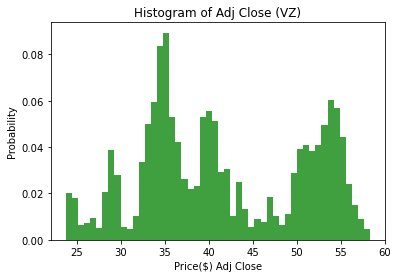

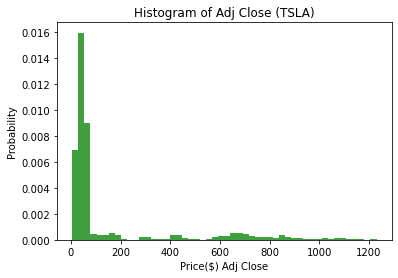

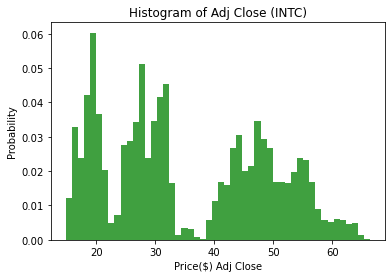

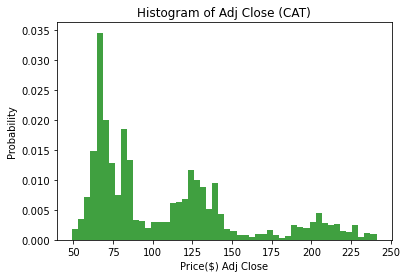

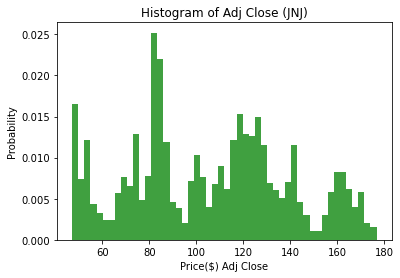

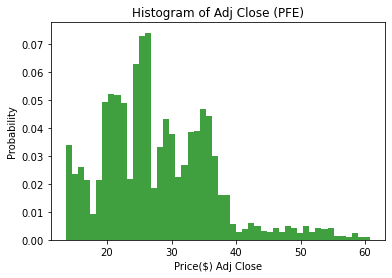

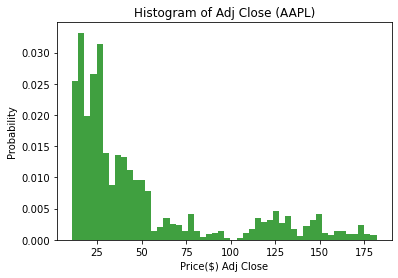

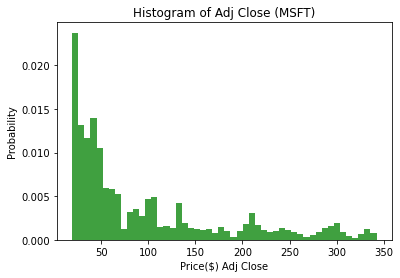

In [24]:
for each in portfolio:
    df = preprocess(pd.read_csv(f'../data/ticker_data/{each}_full_data.csv'))
    df = df.iloc[:,:7]
    
    n, bins, patches = plt.hist(df['adj close'], 50, density=True, facecolor='g',  alpha=0.75)
    plt.xlabel('Price($) Adj Close')
    plt.ylabel('Probability')
    plt.title(f'Histogram of Adj Close ({each})')
    plt.show()
    
    

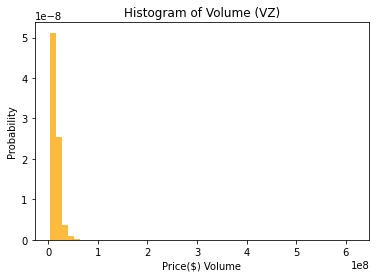

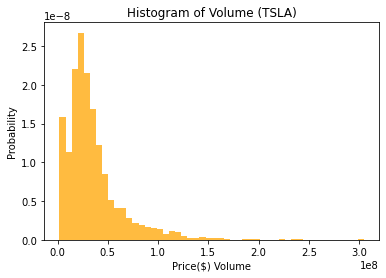

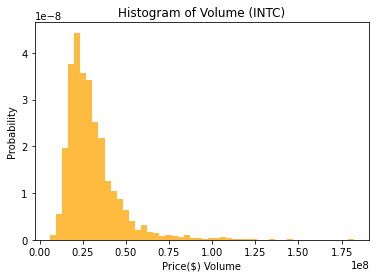

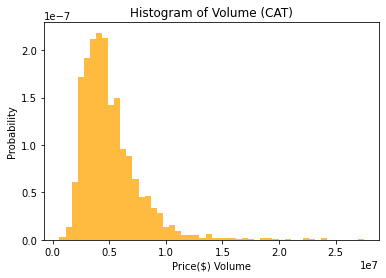

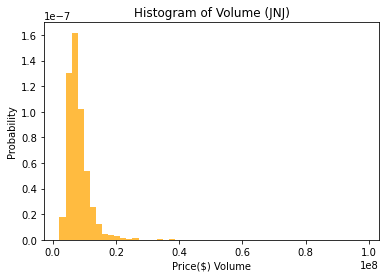

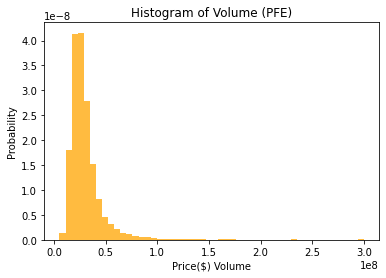

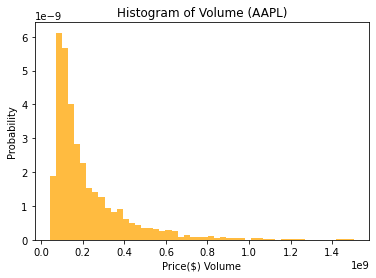

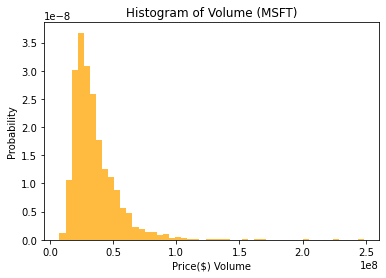

In [26]:
for each in portfolio:
    df = preprocess(pd.read_csv(f'../data/ticker_data/{each}_full_data.csv'))
    df = df.iloc[:,:7]
    
    n, bins, patches = plt.hist(df['volume'], 50, density=True, facecolor='orange',  alpha=0.75)
    plt.xlabel('Price($) Volume')
    plt.ylabel('Probability')
    plt.title(f'Histogram of Volume ({each})')
    plt.show()
    
    